# Ignore Warnings

In [1]:
import warnings
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
warnings.filterwarnings(action='ignore')

# Import Libraries


In [103]:
import pandas as pd
import numpy as np
import nltk
import tensorflow as tf
from nltk.tokenize import RegexpTokenizer, sent_tokenize
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import  TfidfVectorizer
from collections import Counter
from utils.textnormalization import Text_Normalization
from utils.machinelearning import machine_learning_model, fit_model
from utils.deeplearning import model_compile, model_fit, lstm_, gru_, bidirectional_lstm
from utils.plot_model_changes import plot_changes
from utils.sentimentinformation import sentiment_percentage, sentiment_counts
from utils.wordcloud import wordcloud
from utils.most_frequent_word_plot import bar_plot
from utils.deeplearning_preprcosesing import  deeplearning_preprcosesing_
from utils.word_vector import word_vector_
from utils.word_2_vec import word_2_vec_
from utils.confusion_matrix import confusion_matrix_, confusion_matrix_display
from utils.generate_poitive_negative import false_true_positive, false_true_negative
from utils.performance_metrics import accuracy_score, precision_score, sensitivity_score, specificity_score, f1_score, error_rate, performance_metrics_data_frame
from utils.transformers_ import sentiment_analysis_transformers
from utils.model_inference import machine_learning_inference, deep_learning_inference
tokenizer_ = RegexpTokenizer(r'\w+')
pd.options.display.max_rows = 100
pd.options.display.max_columns =None 
tf.keras.utils.set_random_seed(1)

# Download Some Packages

In [3]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('words')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Us

True

# Read Data

In [4]:
Corpus = pd.read_csv('IMDB Dataset.csv')
Corpus.columns = Corpus.columns.str.capitalize()
Corpus['Sentiment'] = Corpus['Sentiment'].map({'negative':'Negative', 'positive': 'Positive'})
Corpus['Review'] = Corpus['Review'].astype(str)
Corpus = Corpus.sample(frac=1, random_state=44, ignore_index=True)
Corpus.index = Corpus.index + 1
Corpus.tail(10)

Review Sentiment
49991  I was looking at the external reviews (Ebert, ...  Positive
49992  Well, first off, the twins are exactly the sam...  Negative
49993  Most folks might say that if one were to spend...  Positive
49994  Once again, I've been duped by seemingly intel...  Negative
49995  This is a gripping story that borrows elements...  Positive
49996  Gung Ho tries to express many ideas and entert...  Positive
49997  Yes this movie features a gal named Jessica wh...  Negative
49998  Except for acknowledging some nice cinematogra...  Negative
49999  Well, I'm an Italian horror big fan and I love...  Positive
50000  Reed Hadley makes a better foppish Don Diego t...  Positive

# Validation Data

In [5]:
reviews = [
    "The movie was fantastic! I really loved the story and the acting was great.",
    "The film was boring and too long. I almost fell asleep.",
    "What a waste of time, terrible plot and awful characters!",
    "An absolute masterpiece, visually stunning and emotionally touching.",
    "The direction was poor, and the plot was hard to follow.",
    "I enjoyed every minute of the movie, especially the special effects!",
    "The movie had a slow start but picked up towards the middle and ended strong.",
    "I wouldn’t recommend this film, the dialogue was cheesy and predictable.",
    "The acting was top-notch, and the story was deeply moving.",
    "The film was just okay, not as great as I expected it to be.",
    "It was one of the best films I've seen this year! Highly recommend.",
    "The soundtrack was fantastic, but the storyline was confusing and hard to follow."
]


# Sentiment Information

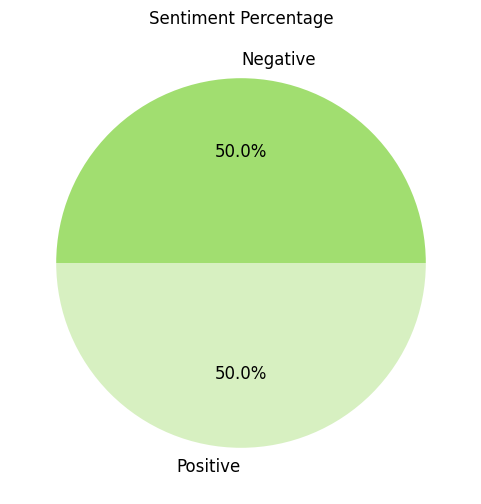

In [6]:
sentiment_percentage(Corpus, 'Sentiment', (6, 6))

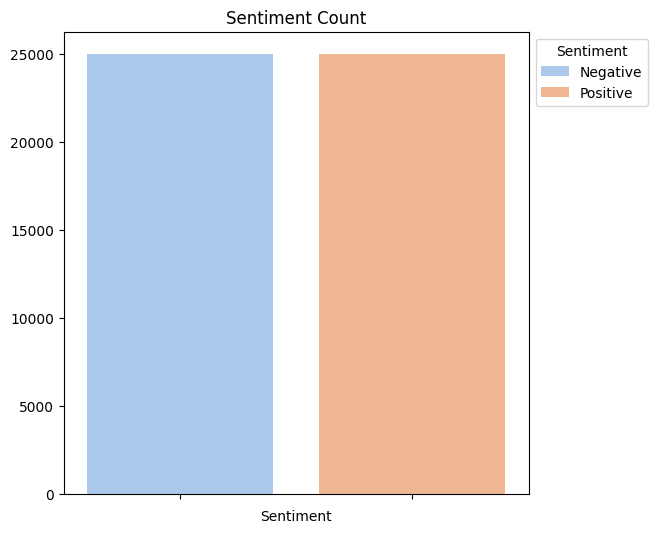

In [7]:
sentiment_counts(Corpus, 'Sentiment', (6, 6))

# Number Of Sentences

In [8]:
Corpus['NumberOfSentences'] = Corpus['Review'].apply(lambda n:len(sent_tokenize(n)))
Corpus.drop(Corpus[Corpus["NumberOfSentences"] == 0].index, inplace = True)
Corpus['NumberOfSentences'].sum()

537072

# Average Number Of Sentences

In [9]:
AverageNumberOfSentence = int(np.round(Corpus["NumberOfSentences"].mean()))
AverageNumberOfSentence

11

# Maximum Number Of Sentences

In [10]:
MaximumNumberOfSentence = Corpus["NumberOfSentences"].max()
MaximumNumberOfSentence

282

# Minimum Number Of Sentences

In [11]:
MinimumNumberOfSentence = Corpus["NumberOfSentences"].min()
MinimumNumberOfSentence

1

# Number Of Words Before Text Normalization

In [12]:
Corpus["Number of Words 1"] = Corpus['Review'].apply(lambda n:len(tokenizer_.tokenize(n)))
Corpus["Number of Words 1"].sum()

11976895

# Average Number Of Words Before Text Normalization

In [13]:
AverageNaumberOfWords1 = int(np.round((Corpus["Number of Words 1"].mean())))
AverageNaumberOfWords1

240

# Maximum Number Of Word Before Text Normalization

In [14]:
MaximumNaumberOfWords1 = Corpus["Number of Words 1"].max()
MaximumNaumberOfWords1

2525

# Minimum Number Of Words Before Text Normalization

In [15]:
MimimumNaumberOfWords1 = Corpus["Number of Words 1"].min()
MimimumNaumberOfWords1

6

In [16]:
Corpus[Corpus["Number of Words 1"] == 0]

Empty DataFrame
Columns: [Review, Sentiment, NumberOfSentences, Number of Words 1]
Index: []

# Number Of Charachters Before Text Normalization

In [17]:
Corpus["Number of Charachters 1"] = Corpus['Review'].apply(lambda n:sum(chr.isalpha() for chr in n))
Corpus["Number of Charachters 1"].sum()

51167213

# Average Number Of Charachters Before Text Normalization

In [18]:
AverageNumberOfCharachters1 = int(np.round(Corpus["Number of Charachters 1"].mean()))
AverageNumberOfCharachters1

1023

# Maximum Number Of Charachters Before Text Normalization

In [19]:
MaximumNumberOfCharachters1 = Corpus['Number of Charachters 1'].max() 
MaximumNumberOfCharachters1

10862

# Minimum Number Of Charachters Before Text Normalization

In [20]:
MinimumNumberOfCharachters1 = Corpus['Number of Charachters 1'].min() 
MinimumNumberOfCharachters1

25

In [21]:
Corpus[Corpus['Number of Charachters 1']==0]

Empty DataFrame
Columns: [Review, Sentiment, NumberOfSentences, Number of Words 1, Number of Charachters 1]
Index: []

# Most Frequent Words Before Text Normalization

In [22]:
MostFrequentWord1 = Counter((Corpus['Review']).str.split().explode()).most_common(15)
MostFrequentWordDF1 = pd.DataFrame(MostFrequentWord1, columns=('Word', 'Count'), index=range(1, 16))
MostFrequentWordDF1

Word   Count
1     the  568735
2       a  306960
3     and  301919
4      of  283625
5      to  261850
6      is  203056
7      in  169981
8       I  132498
9    that  126818
10   this  113726
11     it  107916
12  /><br  100974
13    was   92658
14     as   83130
15   with   82569

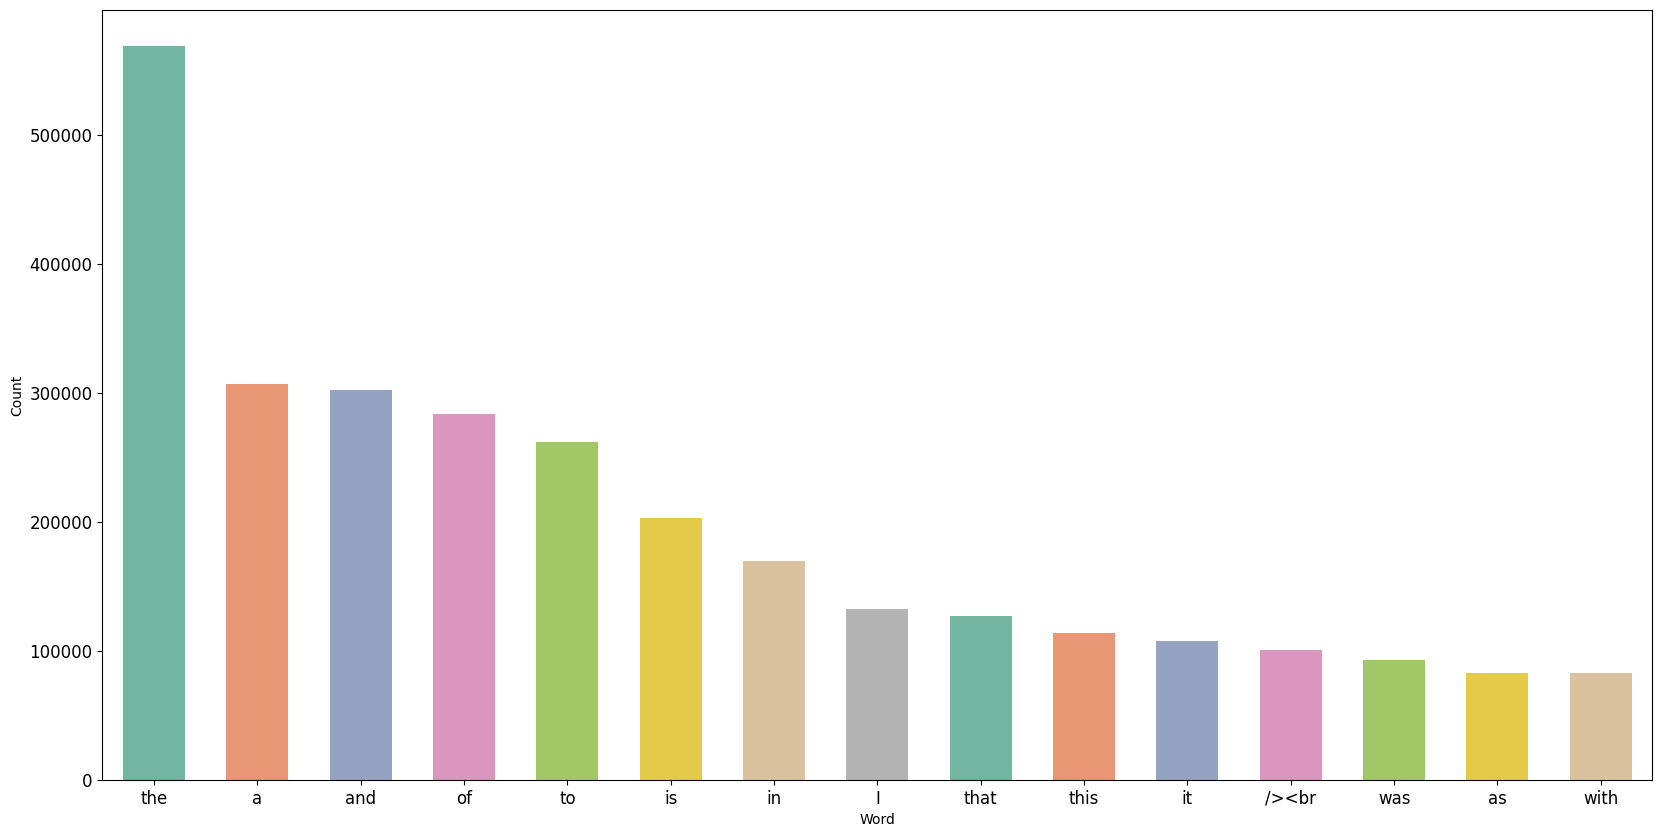

In [23]:
bar_plot(data=MostFrequentWordDF1,  x = 'Word', y='Count')

# Text Normalization

In [24]:
text_normalization = Text_Normalization(string_lower = True,
                                        remove_emojis = True,
                                        remove_hashtags = True,
                                        remove_emails = True,
                                        remove_url = True,   
                                        remove_mention = True,
                                        remove_html_tags = True,
                                        remove_new_line_char = True,
                                        expand_contractions = True, 
                                        remove_stop_words = True,
                                        english_spell_correction= False, # This Is Take Many Time To Finish
                                        remove_duplicate_word = True,
                                        remove_single_letter = True,
                                        remove_duplicated_letter = True,
                                        remove_unicode_and_special_character = True,
                                        remove_punctuations = True,
                                        remove_number = True,
                                        remove_non_english = True,
                                        remove_longest_than = True,
                                        remove_extra_whitespace = True)


In [25]:
Corpus['Normalized_Review'] = Corpus['Review'].map(lambda x: text_normalization.text_normalization(x))
Corpus.dropna(axis=1, inplace=True)
Corpus.to_csv('Normalized Corpus.csv')
Corpus.tail()

Review Sentiment  \
49996  Gung Ho tries to express many ideas and entert...  Positive   
49997  Yes this movie features a gal named Jessica wh...  Negative   
49998  Except for acknowledging some nice cinematogra...  Negative   
49999  Well, I'm an Italian horror big fan and I love...  Positive   
50000  Reed Hadley makes a better foppish Don Diego t...  Positive   

       NumberOfSentences  Number of Words 1  Number of Charachters 1  \
49996                  6                 58                      283   
49997                  7                150                      605   
49998                  7                156                      729   
49999                  8                219                      929   
50000                  4                132                      567   

                                       Normalized_Review  
49996  gung ho tries express ideas entertain wiseguy ...  
49997  yes movie features gal named jessica who says ...  
49998  acknowledging nice cinematography can say posi...  
49999  well italian horror big fan love movies direct...  
50000  reed hadley makes foppish don diego dashing da...

# Number Of Unique Words

In [26]:
UniqueWords = set()
for word in Corpus['Normalized_Review'].str.split():
    UniqueWords.update(word)

len(UniqueWords)

92357

# WordCloud

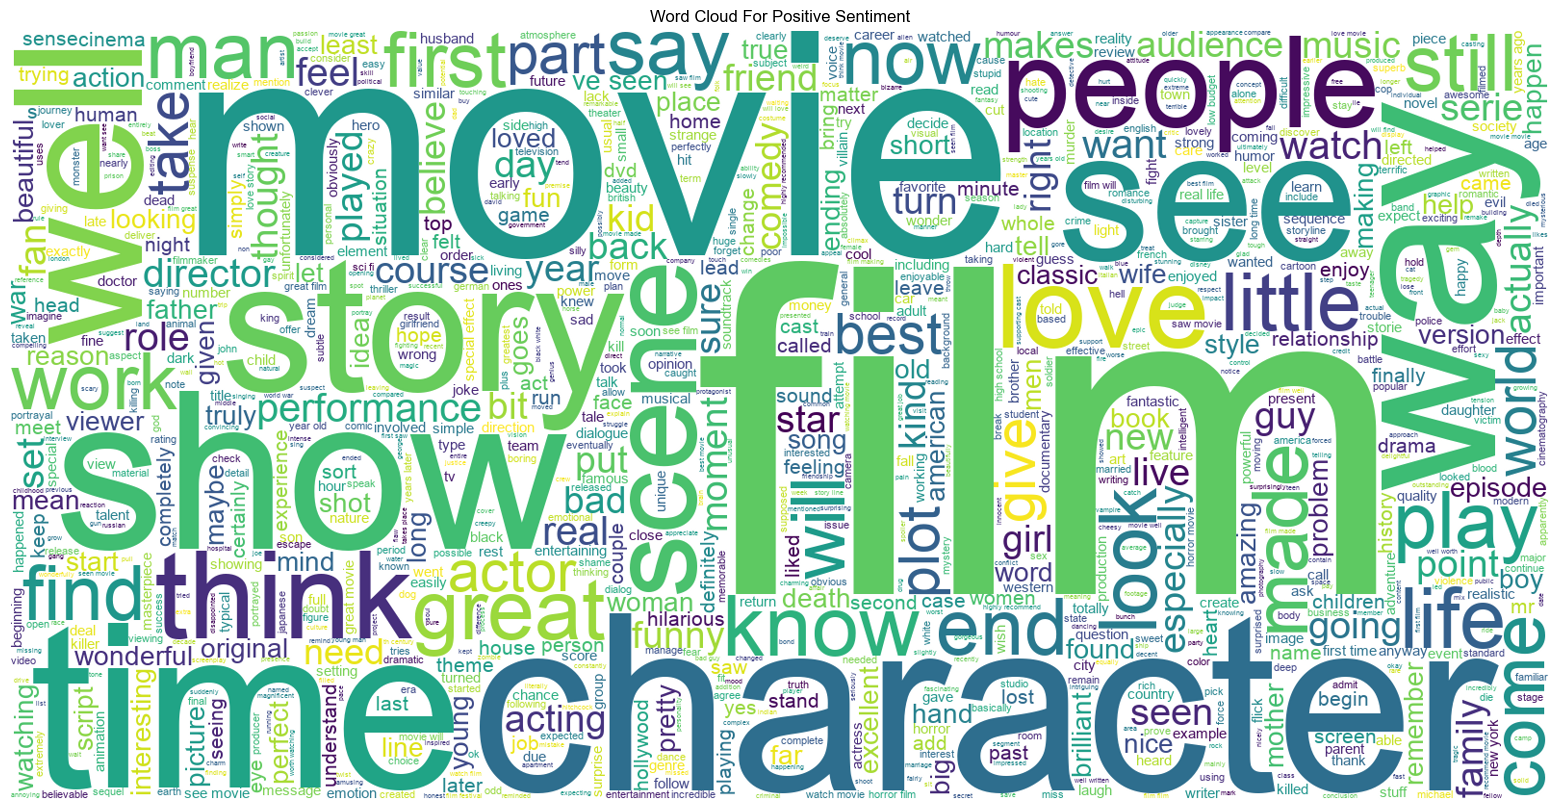

In [27]:
wordcloud(data=Corpus, target='Positive', width=1600, hieght=800, review='Normalized_Review', max_words= 1000)

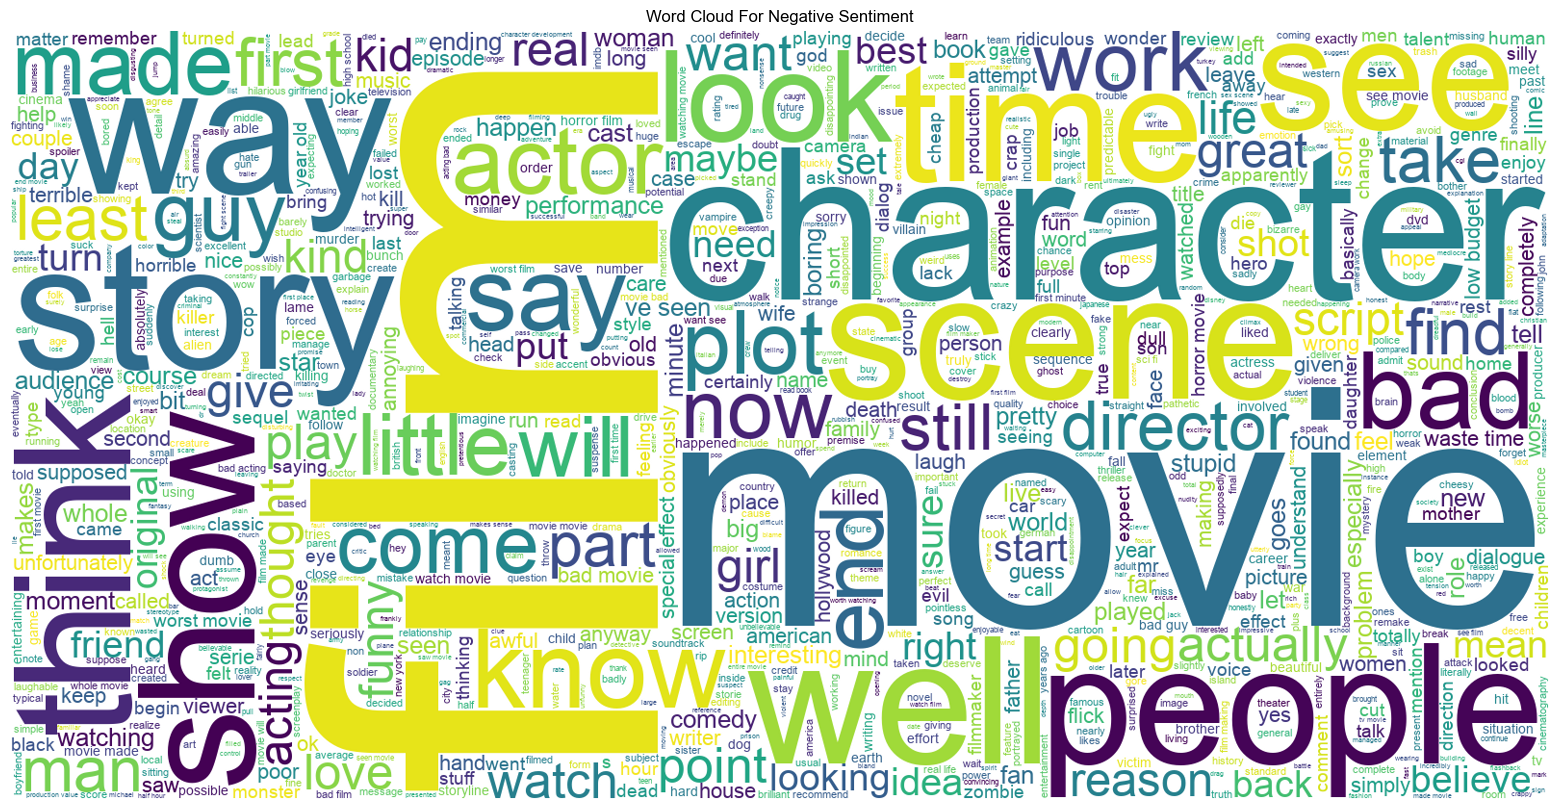

In [28]:
wordcloud(data=Corpus, target='Negative', width=1600, hieght=800, review='Normalized_Review', max_words= 1000)

# Number Of Words After Text Normalization

In [29]:
Corpus["Number of Words 2"] = Corpus["Normalized_Review"].apply(lambda n:len(tokenizer_.tokenize(n)))
Corpus.drop(Corpus[Corpus["Number of Words 2"] == 0].index, inplace = True)
Corpus["Number of Words 2"].sum()

5329215

# Average Number Of Words After Text Normalization

In [30]:
AverageNaumberOfWords2 = int(np.round((Corpus["Number of Words 2"].mean())))
AverageNaumberOfWords2

107

# Maximum Number Of Word After Text Normalization

In [31]:
MaximumNaumberOfWords2 = Corpus["Number of Words 2"].max()
MaximumNaumberOfWords2

1293

# Minimum Number Of Words After Text Normalization

In [32]:
MimimumNaumberOfWords2 = Corpus["Number of Words 2"].min()
MimimumNaumberOfWords2

1

# Number Of Charachters After Text Normalization

In [33]:
Corpus["Number of Charachters 2"] = Corpus["Normalized_Review"].apply(lambda n:sum(chr.isalpha() for chr in n))
Corpus["Number of Charachters 2"].sum()

31570383

# Average Number Of Charachters After Text Normalization

In [34]:
AverageNumberOfCharachters2 = int(np.round(Corpus["Number of Charachters 2"].mean()))
AverageNumberOfCharachters2

631

# Maximum Number Of Charachters After Text Normalization

In [35]:
MaximumNumberOfCharachters2 = Corpus['Number of Charachters 2'].max() 
MaximumNumberOfCharachters2

7217

# Minimum Number Of Charachters After Text Normalization

In [36]:
MinimumNumberOfCharachters2 = Corpus['Number of Charachters 2'].min() 
MinimumNumberOfCharachters2

2

# Most Frequent Words After Text Normalization

In [37]:
MostFrequentWord2 = Counter((Corpus['Normalized_Review']).str.split().explode()).most_common(15)
MostFrequentWordDF2 = pd.DataFrame(MostFrequentWord2, columns=('Word', 'Count'), index=range(1, 16))
MostFrequentWordDF2

Word  Count
1    movie  87868
2     film  79618
3      who  43587
4     like  40105
5     just  35126
6      can  29000
7     time  25071
8     will  24238
9     only  23212
10   story  23110
11     see  22987
12    well  21240
13     bad  18405
14  people  18159
15   great  18124

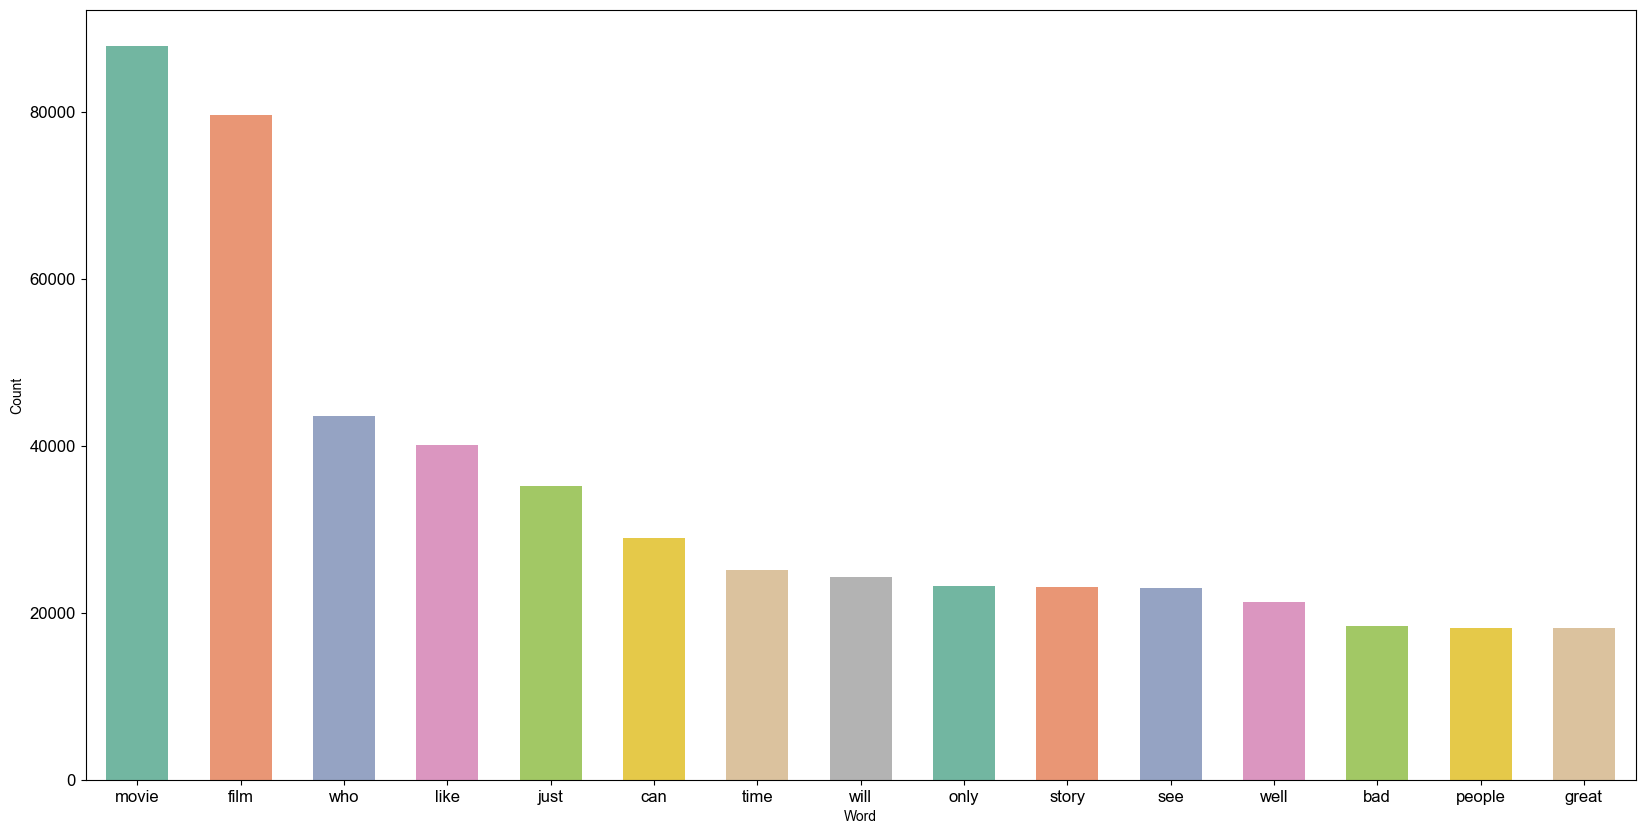

In [38]:
bar_plot(data=MostFrequentWordDF2, x = 'Word', y='Count')

# Most Frequent Words Of Each Sentiment

**1-Positive**

In [39]:
Positive = Corpus[Corpus['Sentiment'] == 'Positive']

In [40]:
PositiveMostFrequentWord = Counter((Positive['Normalized_Review']).str.split().explode()).most_common(10)
PositiveMostFrequentWordDF = pd.DataFrame(PositiveMostFrequentWord, columns=('Word', 'Count'), index=range(1, 11))
PositiveMostFrequentWordDF

Word  Count
1    film  42074
2   movie  37819
3     who  23304
4    like  17683
5    just  14085
6     can  13928
7    will  13385
8   great  12949
9   story  12932
10   time  12734

**2-Negative**

In [41]:
Negative = Corpus[Corpus['Sentiment'] == 'Negative']

In [42]:
NegativeMostFrequentWord = Counter((Negative['Normalized_Review']).str.split().explode()).most_common(10)
NegativeMostFrequentWordDF = pd.DataFrame(NegativeMostFrequentWord, columns=('Word', 'Count'), index=range(1, 11))
NegativeMostFrequentWordDF

Word  Count
1   movie  50049
2    film  37544
3    like  22422
4    just  21041
5     who  20283
6     can  15072
7     bad  14665
8    only  13357
9    time  12337
10   will  10853

# Part Of Speech Tagging (POS)

In [43]:
word_ = list(UniqueWords)
pos = nltk.pos_tag(word_)
word = []
tag = []

In [44]:
for i in pos:
    word.append(i[0])
    tag.append(i[1])

In [45]:
pos = pd.DataFrame(zip(word, tag), columns=['Word', 'Tag'])
pos.tail()

Word  Tag
92352   shmatte   JJ
92353   roomate   NN
92354     herod   NN
92355  exfriend  VBP
92356   poetics  NNS

In [46]:
pos['Tag'].value_counts()

Tag
NN      34427
JJ      18709
NNS     12694
VBP      7243
VBG      4870
VBD      4238
RB       4201
VBZ      1881
VBN      1411
IN        664
VB        382
JJS       370
JJR       349
FW        302
RBR       191
NNP       184
CD         46
CC         36
PRP        36
RP         33
DT         18
WP         16
MD         15
WRB        14
RBS         9
PRP$        5
WDT         5
EX          3
TO          2
POS         1
UH          1
NNPS        1
Name: count, dtype: int64

# Bigrams

In [47]:
Corpus['Bigrams'] = Corpus['Normalized_Review'].apply(lambda x: list(nltk.bigrams(x.split( ))))
Corpus

Review Sentiment  \
1      First, let me state that I am a big fan of Ash...  Negative   
2      <br /><br />Worst. Movie. Ever.<br /><br />Wha...  Negative   
3      Wonderful family film that should be a staple ...  Positive   
4      One reviewer notes that it does not seem to ma...  Positive   
5      Saw the film at it's Lawrence, Kansas premiere...  Negative   
...                                                  ...       ...   
49996  Gung Ho tries to express many ideas and entert...  Positive   
49997  Yes this movie features a gal named Jessica wh...  Negative   
49998  Except for acknowledging some nice cinematogra...  Negative   
49999  Well, I'm an Italian horror big fan and I love...  Positive   
50000  Reed Hadley makes a better foppish Don Diego t...  Positive   

       NumberOfSentences  Number of Words 1  Number of Charachters 1  \
1                     12                234                      984   
2                      5                 80                      361   
3                     18                255                     1023   
4                     17                260                     1060   
5                      9                135                      555   
...                  ...                ...                      ...   
49996                  6                 58                      283   
49997                  7                150                      605   
49998                  7                156                      729   
49999                  8                219                      929   
50000                  4                132                      567   

                                       Normalized_Review  Number of Words 2  \
1      first let state am big fan ashley judd curious...                100   
2      worst movie purpose filming remake turning min...                 37   
3      wonderful family film staple christmas time my...                123   
4      reviewer notes matter welles actually says mov...                100   
5      saw film lawrence kansas premiere wavering sto...                 55   
...                                                  ...                ...   
49996  gung ho tries express ideas entertain wiseguy ...                 28   
49997  yes movie features gal named jessica who says ...                 71   
49998  acknowledging nice cinematography can say posi...                 67   
49999  well italian horror big fan love movies direct...                103   
50000  reed hadley makes foppish don diego dashing da...                 61   

       Number of Charachters 2  \
1                          615   
2                          239   
3                          669   
4                          543   
5                          316   
...                        ...   
49996                      176   
49997                      359   
49998                      441   
49999                      599   
50000                      337   

                                                 Bigrams  
1      [(first, let), (let, state), (state, am), (am,...  
2      [(worst, movie), (movie, purpose), (purpose, f...  
3      [(wonderful, family), (family, film), (film, s...  
4      [(reviewer, notes), (notes, matter), (matter, ...  
5      [(saw, film), (film, lawrence), (lawrence, kan...  
...                                                  ...  
49996  [(gung, ho), (ho, tries), (tries, express), (e...  
49997  [(yes, movie), (movie, features), (features, g...  
49998  [(acknowledging, nice), (nice, cinematography)...  
49999  [(well, italian), (italian, horror), (horror, ...  
50000  [(reed, hadley), (hadley, makes), (makes, fopp...  

[49995 rows x 9 columns]

# Split The Dataset Into Dependent (X) And Independent (y)

In [48]:
X, y = Corpus['Normalized_Review'], Corpus['Sentiment']

# Encoding Dependent Variables (Y) Into Integer

In [49]:
le = LabelEncoder()
y = le.fit_transform(y)

# Split The Dataset Into Training And Testing

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42,  stratify=y)

# Vectorizer

In [51]:
Vectorizer = TfidfVectorizer()
X_train_Vec = Vectorizer.fit_transform(X_train)
X_test_Vec = Vectorizer.transform(X_test)

# Word Mapping

In [52]:
Word_mapping = Vectorizer.vocabulary_
Word_mapping_ =pd.DataFrame((list(Word_mapping.items())), columns=['Word', 'Mapping'])
Word_mapping_.head()

Word  Mapping
0  mysteriously    50434
1      positive    57756
2       reviews    62844
3          high    34384
4        rating    60655

# Machine Learning

**1-Naive Bayes**

In [53]:
Algorithm = MultinomialNB(alpha= 1)
model_1 = machine_learning_model(algorithm=Algorithm)
fit_model(model=model_1, X_train=X_train_Vec, y_train=y_train)

MultinomialNB(alpha=1)

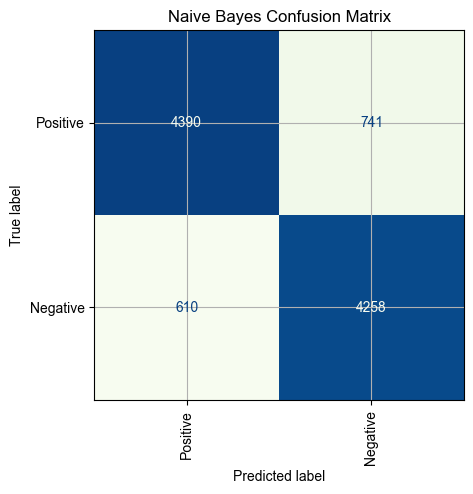

In [54]:
y_predNB = model_1.predict(X_test_Vec)
ConfusionMatrixNB = confusion_matrix_(y_test = y_test, y_pred = y_predNB)
confusion_matrix_display(confusionmatrix = ConfusionMatrixNB, name = 'Naive Bayes')

In [55]:
False_PositiveNB, True_PositiveNB = false_true_positive(Confusin_Matrix = ConfusionMatrixNB)
False_NegativeNB, True_NegativeNB = false_true_negative(Confusin_Matrix = ConfusionMatrixNB)

In [56]:
AccuracyNB = accuracy_score(True_Positive = True_PositiveNB, True_Negative = True_NegativeNB, False_Positive =False_PositiveNB, False_Negative = False_NegativeNB)
PrecisionNB= precision_score(True_Positive = True_PositiveNB, False_Positive= False_PositiveNB)

SensitivityNB = sensitivity_score(True_Positive = True_PositiveNB,  False_Negative = False_NegativeNB)
SpecificityNB = specificity_score(True_Negative = True_NegativeNB, False_Positive = False_PositiveNB)

F1ScoreNB = f1_score(True_Positive = True_PositiveNB, False_Negative = False_NegativeNB, False_Positive = False_PositiveNB)
ErrorNB = error_rate(True_Positive = True_PositiveNB, True_Negative = True_NegativeNB, False_Positive =False_PositiveNB, False_Negative = False_NegativeNB)

In [57]:
performance_metrics_data_frame(Accuracy = AccuracyNB, Precision = PrecisionNB, Sensitivity = SensitivityNB, Specificity = SpecificityNB, F1Score = F1ScoreNB, Error = ErrorNB)

Values
Accuracy     0.864886
Precision    0.855584
Sensitivity  0.878000
Specificity  0.851770
F1Score      0.866647
Error        0.135114

**2-Logistic Regression**

In [58]:
Algorithm = LogisticRegression()
model_2 = machine_learning_model(algorithm=Algorithm)
fit_model(model=model_2, X_train=X_train_Vec, y_train=y_train)


LogisticRegression()

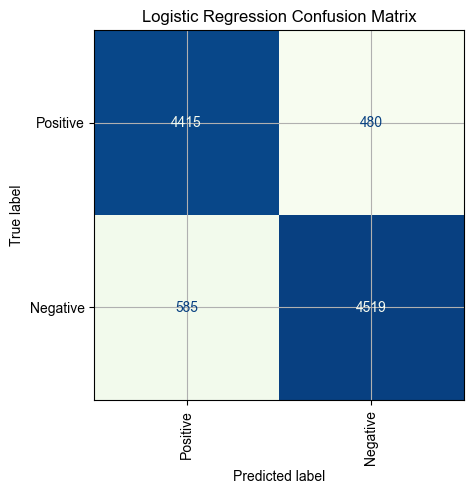

In [59]:
y_predLR = model_2.predict(X_test_Vec)
ConfusionMatrixLR = confusion_matrix_(y_test = y_test, y_pred = y_predLR)
confusion_matrix_display(confusionmatrix = ConfusionMatrixLR, name = 'Logistic Regression')

In [60]:
False_PositiveLR, True_PositiveLR = false_true_positive(Confusin_Matrix = ConfusionMatrixLR)
False_NegativeLR, True_NegativeLR = false_true_negative(Confusin_Matrix = ConfusionMatrixLR)

In [61]:
AccuracyLR = accuracy_score(True_Positive = True_PositiveLR, True_Negative = True_NegativeLR, False_Positive =False_PositiveLR, False_Negative = False_NegativeLR)
PrecisionLR= precision_score(True_Positive = True_PositiveLR, False_Positive= False_PositiveLR)

SensitivityLR = sensitivity_score(True_Positive = True_PositiveLR,  False_Negative = False_NegativeLR)
SpecificityLR = specificity_score(True_Negative = True_NegativeLR, False_Positive = False_PositiveLR)

F1ScoreLR = f1_score(True_Positive = True_PositiveLR, False_Negative = False_NegativeLR, False_Positive = False_PositiveLR)
ErrorLR = error_rate(True_Positive = True_PositiveLR, True_Negative = True_NegativeLR, False_Positive =False_PositiveLR, False_Negative = False_NegativeLR)

In [62]:
performance_metrics_data_frame(Accuracy = AccuracyLR, Precision = PrecisionLR, Sensitivity = SensitivityLR, Specificity = SpecificityLR, F1Score = F1ScoreLR, Error = ErrorLR)

Values
Accuracy     0.893489
Precision    0.901941
Sensitivity  0.883000
Specificity  0.903981
F1Score      0.892370
Error        0.106511

**3-Decision Tree**

In [63]:
Algorithm = DecisionTreeClassifier(criterion='gini', )
model_3 = machine_learning_model(algorithm=Algorithm)
fit_model(model=model_3, X_train=X_train_Vec, y_train=y_train)

DecisionTreeClassifier()

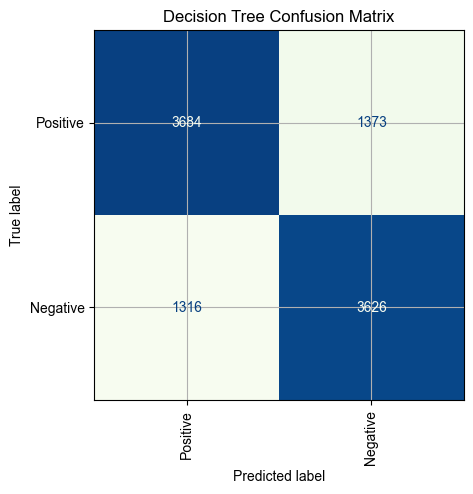

In [64]:
y_predDT = model_3.predict(X_test_Vec)
ConfusionMatrixDT = confusion_matrix_(y_test = y_test, y_pred = y_predDT)
confusion_matrix_display(confusionmatrix = ConfusionMatrixDT, name = 'Decision Tree')

In [65]:
False_PositiveDT, True_PositiveDT = false_true_positive(Confusin_Matrix = ConfusionMatrixDT)
False_NegativeDT, True_NegativeDT = false_true_negative(Confusin_Matrix = ConfusionMatrixDT)

In [66]:
AccuracyDT = accuracy_score(True_Positive = True_PositiveDT, True_Negative = True_NegativeDT, False_Positive =False_PositiveDT, False_Negative = False_NegativeDT)
PrecisionDT= precision_score(True_Positive = True_PositiveDT, False_Positive =False_PositiveDT)

SensitivityDT = sensitivity_score(True_Positive = True_PositiveDT,  False_Negative = False_NegativeDT)
SpecificityDT = specificity_score(True_Negative = True_NegativeDT, False_Positive = False_PositiveDT)

F1ScoreDT = f1_score(True_Positive = True_PositiveDT, False_Negative = False_NegativeDT, False_Positive = False_PositiveDT)
ErrorDT = error_rate(True_Positive = True_PositiveDT, True_Negative = True_NegativeDT, False_Positive =False_PositiveDT, False_Negative = False_NegativeDT)

In [67]:
performance_metrics_data_frame(Accuracy = AccuracyDT, Precision = PrecisionDT, Sensitivity = SensitivityDT, Specificity = SpecificityDT, F1Score = F1ScoreDT, Error = ErrorDT)

Values
Accuracy     0.731073
Precision    0.728495
Sensitivity  0.736800
Specificity  0.725345
F1Score      0.732624
Error        0.268927

**4-K Nearest Neighbors**

In [68]:
Algorithm =KNeighborsClassifier(metric='minkowski', n_neighbors=5, weights='distance', p=2)
model_4 = machine_learning_model(algorithm=Algorithm)
fit_model(model=model_4, X_train=X_train_Vec, y_train=y_train)

KNeighborsClassifier(weights='distance')

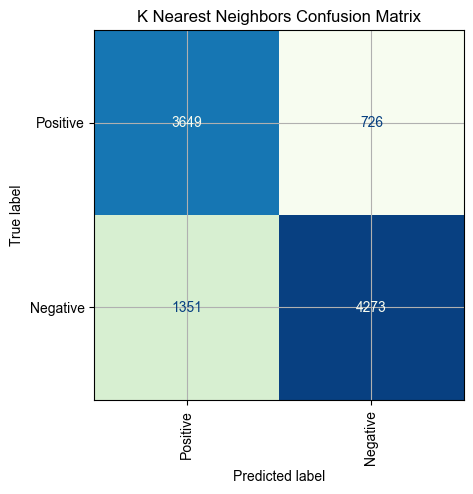

In [69]:
y_predKNN = model_4.predict(X_test_Vec)
ConfusionMatrixKNN = confusion_matrix_(y_test = y_test, y_pred = y_predKNN)
confusion_matrix_display(confusionmatrix = ConfusionMatrixKNN, name = 'K Nearest Neighbors')

In [70]:
False_PositiveKNN, True_PositiveKNN = false_true_positive(Confusin_Matrix = ConfusionMatrixKNN)
False_NegativeKNN, True_NegativeKNN = false_true_negative(Confusin_Matrix = ConfusionMatrixKNN)

In [71]:
AccuracyKNN = accuracy_score(True_Positive = True_PositiveKNN, True_Negative = True_NegativeKNN, False_Positive =False_PositiveKNN, False_Negative = False_NegativeKNN)
PrecisionKNN= precision_score(True_Positive = True_PositiveKNN, False_Positive =False_PositiveKNN)

SensitivityKNN = sensitivity_score(True_Positive = True_PositiveKNN,  False_Negative = False_NegativeKNN)
SpecificityKNN = specificity_score(True_Negative = True_NegativeKNN, False_Positive = False_PositiveKNN)

F1ScoreKNN = f1_score(True_Positive = True_PositiveKNN, False_Negative = False_NegativeKNN, False_Positive = False_PositiveKNN)
ErrorKNN = error_rate(True_Positive = True_PositiveKNN, True_Negative = True_NegativeKNN, False_Positive =False_PositiveKNN, False_Negative = False_NegativeKNN)

In [72]:
performance_metrics_data_frame(Accuracy = AccuracyKNN, Precision = PrecisionKNN, Sensitivity = SensitivityKNN, Specificity = SpecificityKNN, F1Score = F1ScoreKNN, Error = ErrorKNN)

Values
Accuracy     0.792279
Precision    0.834057
Sensitivity  0.729800
Specificity  0.854771
F1Score      0.778453
Error        0.207721

**5-Random Forest**

In [73]:
Algorithm = RandomForestClassifier(criterion = 'entropy', n_estimators=100, )
model_5 = machine_learning_model(algorithm=Algorithm)
fit_model(model=model_5, X_train=X_train_Vec, y_train=y_train)

RandomForestClassifier(criterion='entropy')

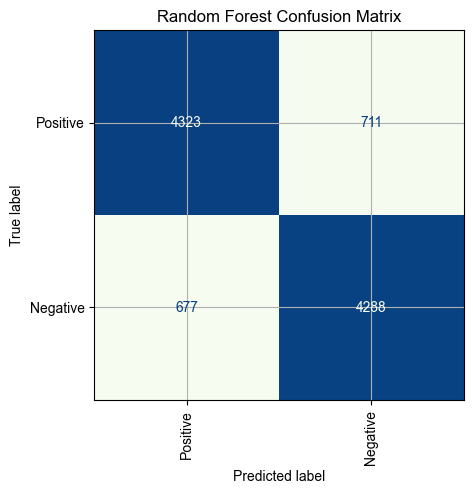

In [74]:
y_predRF = model_5.predict(X_test_Vec)
ConfusionMatrixRF = confusion_matrix_(y_test = y_test, y_pred = y_predRF)
confusion_matrix_display(confusionmatrix = ConfusionMatrixRF, name = 'Random Forest')

In [75]:
False_PositiveRF, True_PositiveRF = false_true_positive(Confusin_Matrix = ConfusionMatrixRF)
False_NegativeRF, True_NegativeRF = false_true_negative(Confusin_Matrix = ConfusionMatrixRF)

In [76]:
AccuracyRF = accuracy_score(True_Positive = True_PositiveRF, True_Negative = True_NegativeRF, False_Positive =False_PositiveRF, False_Negative = False_NegativeRF)
PrecisionRF= precision_score(True_Positive = True_PositiveRF, False_Positive =False_PositiveRF)

SensitivityRF = sensitivity_score(True_Positive = True_PositiveRF,  False_Negative = False_NegativeRF)
SpecificityRF = specificity_score(True_Negative = True_NegativeRF, False_Positive = False_PositiveRF)

F1ScoreRF = f1_score(True_Positive = True_PositiveRF, False_Negative = False_NegativeRF, False_Positive = False_PositiveRF)
ErrorRF = error_rate(True_Positive = True_PositiveRF, True_Negative = True_NegativeRF, False_Positive =False_PositiveRF, False_Negative = False_NegativeRF)

In [77]:
performance_metrics_data_frame(Accuracy = AccuracyRF, Precision = PrecisionRF, Sensitivity = SensitivityRF, Specificity = SpecificityRF, F1Score = F1ScoreRF, Error = ErrorRF)

Values
Accuracy     0.861186
Precision    0.858760
Sensitivity  0.864600
Specificity  0.857772
F1Score      0.861670
Error        0.138814

**6-SGD Classifier**

In [78]:
Algorithm = SGDClassifier(loss='hinge', )
model_6 = machine_learning_model(algorithm=Algorithm)
fit_model(model=model_6, X_train=X_train_Vec, y_train=y_train)

SGDClassifier()

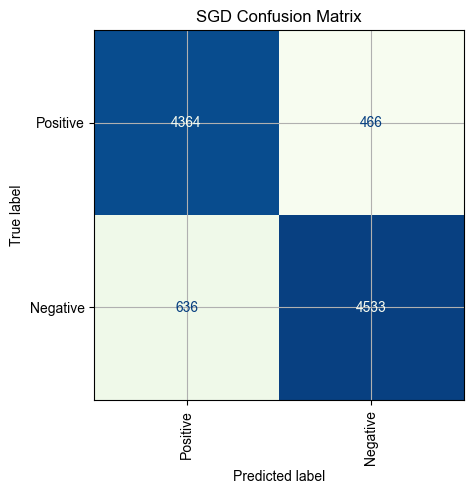

In [79]:
y_predSGD = model_6.predict(X_test_Vec)
ConfusionMatrixSGD = confusion_matrix_(y_test = y_test, y_pred = y_predSGD)
confusion_matrix_display(confusionmatrix = ConfusionMatrixSGD, name = 'SGD')

In [80]:
False_PositiveSGD, True_PositiveSGD = false_true_positive(Confusin_Matrix = ConfusionMatrixSGD)
False_NegativeSGD, True_NegativeSGD = false_true_negative(Confusin_Matrix = ConfusionMatrixSGD)

In [81]:
AccuracySGD = accuracy_score(True_Positive = True_PositiveSGD, True_Negative = True_NegativeSGD, False_Positive =False_PositiveSGD, False_Negative = False_NegativeSGD)
PrecisionSGD= precision_score(True_Positive = True_PositiveSGD, False_Positive =False_PositiveSGD)

SensitivitySGD = sensitivity_score(True_Positive = True_PositiveSGD,  False_Negative = False_NegativeSGD)
SpecificitySGD = specificity_score(True_Negative = True_NegativeSGD, False_Positive = False_PositiveSGD)

F1ScoreSGD = f1_score(True_Positive = True_PositiveSGD, False_Negative = False_NegativeSGD, False_Positive = False_PositiveSGD)
ErrorSGD = error_rate(True_Positive = True_PositiveSGD, True_Negative = True_NegativeSGD, False_Positive =False_PositiveSGD, False_Negative = False_NegativeSGD)

In [82]:
performance_metrics_data_frame(Accuracy = AccuracySGD, Precision = PrecisionSGD, Sensitivity = SensitivitySGD, Specificity = SpecificitySGD, F1Score = F1ScoreSGD, Error = ErrorSGD)

Values
Accuracy     0.889789
Precision    0.903520
Sensitivity  0.872800
Specificity  0.906781
F1Score      0.887894
Error        0.110211

# Deep Learning

**1.Preprocessing**

In [104]:
tokenizer, vocab_size, max_length, encoded_X_train , encoded_X_test = deeplearning_preprcosesing_(X_train=X_train, X_test=X_test, truncating='pre', padding='pre')

In [84]:
print('The Vocab Size Is :',vocab_size)
print('')
print('The Max Length Is :', max_length)

The Vocab Size Is : 85093

The Max Length Is : 1293


**2.Word Index**

In [85]:
Word_Index_ =pd.DataFrame(((list(tokenizer.word_index.items()))), columns=['Word', 'Index'])
Word_Index_.head()

Word  Index
0  <oov>      1
1  movie      2
2   film      3
3    who      4
4   like      5

**3.Generate Word Vector**

In [86]:
path = 'glove.6B.50d.txt'
embedding_dim, word_vector = word_vector_(path, vocab_size, tokenizer)

# Deep Learing Models

**7-LSTM**

Epoch 1/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 284s 226ms/step - accuracy: 0.5755 - loss: 0.6651 - val_accuracy: 0.7618 - val_loss: 0.5042 - learning_rate: 1.0000e-04
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 287s 229ms/step - accuracy: 0.7830 - loss: 0.4701 - val_accuracy: 0.8118 - val_loss: 0.4192 - learning_rate: 1.0000e-04
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 299s 239ms/step - accuracy: 0.8302 - loss: 0.3942 - val_accuracy: 0.8388 - val_loss: 0.3728 - learning_rate: 1.0000e-04
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 284s 227ms/step - accuracy: 0.8596 - loss: 0.3414 - val_accuracy: 0.8551 - val_loss: 0.3398 - learning_rate: 1.0000e-04
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 273s 219ms/step - accuracy: 0.8806 - loss: 0.2996 - val_accuracy: 0.8663 - val_loss: 0.3199 - learning_rate: 1.0000e-04
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 281s 225ms/step - accuracy: 0.8968 - loss: 0.2666 - val_accuracy: 0.8733 - val_loss: 0.3134 - learning_rate: 1.0000e-04
Epoch 7/100
1250/1250 

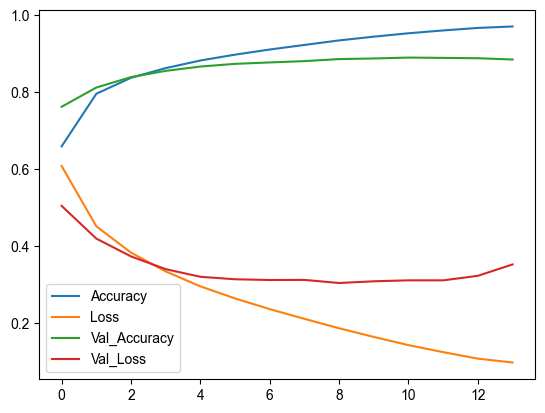

In [87]:
model_7 =lstm_(vocab_size = vocab_size + 1, embedding_dim = embedding_dim, max_length=max_length, units = 32,embeddings_matrix = word_vector)
model_compile(model=model_7)
history = model_fit(model=model_7, X_train=encoded_X_train, y_train=y_train, X_test=encoded_X_test, y_test=y_test, epochs=100, batch_size=32)
plot_changes(histoty=history)       

**8-Bidirectional LSTM**

Epoch 1/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 471s 372ms/step - accuracy: 0.6205 - loss: 0.6412 - val_accuracy: 0.7814 - val_loss: 0.4804 - learning_rate: 1.0000e-04
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 487s 390ms/step - accuracy: 0.7931 - loss: 0.4590 - val_accuracy: 0.8214 - val_loss: 0.4134 - learning_rate: 1.0000e-04
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 476s 381ms/step - accuracy: 0.8324 - loss: 0.3897 - val_accuracy: 0.8446 - val_loss: 0.3699 - learning_rate: 1.0000e-04
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 481s 385ms/step - accuracy: 0.8661 - loss: 0.3332 - val_accuracy: 0.8622 - val_loss: 0.3371 - learning_rate: 1.0000e-04
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 459s 367ms/step - accuracy: 0.8894 - loss: 0.2857 - val_accuracy: 0.8722 - val_loss: 0.3187 - learning_rate: 1.0000e-04
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 471s 377ms/step - accuracy: 0.9078 - loss: 0.2464 - val_accuracy: 0.8764 - val_loss: 0.3088 - learning_rate: 1.0000e-04
Epoch 7/100
1250/1250 

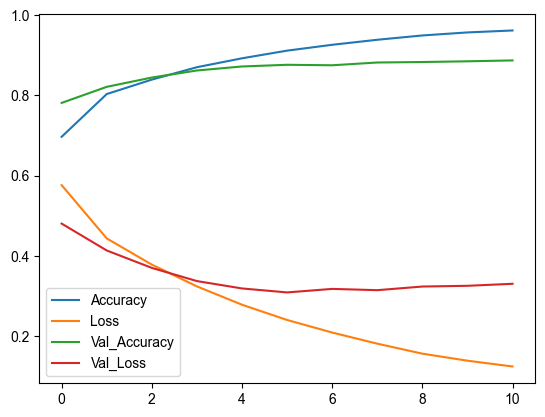

In [88]:
model_8 = bidirectional_lstm(vocab_size = vocab_size +1, embedding_dim = embedding_dim, max_length=max_length, units = 32, embeddings_matrix = word_vector)
model_compile(model=model_8)
history = model_fit(model=model_8, X_train=encoded_X_train, y_train=y_train,  X_test=encoded_X_test, y_test=y_test, epochs=100, batch_size=32)
plot_changes(histoty=history)

**9-GRU**

Epoch 1/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 317s 253ms/step - accuracy: 0.5744 - loss: 0.6788 - val_accuracy: 0.6989 - val_loss: 0.5799 - learning_rate: 1.0000e-04
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 313s 250ms/step - accuracy: 0.7589 - loss: 0.5001 - val_accuracy: 0.8059 - val_loss: 0.4311 - learning_rate: 1.0000e-04
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 312s 250ms/step - accuracy: 0.8238 - loss: 0.4003 - val_accuracy: 0.8345 - val_loss: 0.3800 - learning_rate: 1.0000e-04
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 313s 250ms/step - accuracy: 0.8540 - loss: 0.3426 - val_accuracy: 0.8538 - val_loss: 0.3473 - learning_rate: 1.0000e-04
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 315s 252ms/step - accuracy: 0.8771 - loss: 0.2987 - val_accuracy: 0.8649 - val_loss: 0.3292 - learning_rate: 1.0000e-04
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 311s 249ms/step - accuracy: 0.8966 - loss: 0.2628 - val_accuracy: 0.8744 - val_loss: 0.3140 - learning_rate: 1.0000e-04
Epoch 7/100
1250/1250 

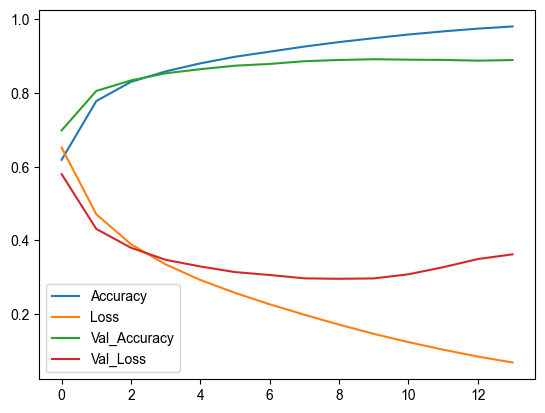

In [89]:
model_9 = gru_(vocab_size = vocab_size + 1, embedding_dim = embedding_dim, max_length=max_length, units = 32, embeddings_matrix = word_vector)
model_compile(model=model_9)
history = model_fit(model=model_9, X_train=encoded_X_train, y_train=y_train, epochs=100, X_test=encoded_X_test, y_test=y_test, batch_size=32)
plot_changes(histoty=history)

# Model Inference

**1-Naive Bayes**

In [90]:
machine_learning_inference(model=model_1,vectorizer=Vectorizer, text = reviews)

Review: The movie was fantastic! I really loved the story and the acting was great.
Sentiment: Positive

Review: The film was boring and too long. I almost fell asleep.
Sentiment: Negative

Review: What a waste of time, terrible plot and awful characters!
Sentiment: Negative

Review: An absolute masterpiece, visually stunning and emotionally touching.
Sentiment: Positive

Review: The direction was poor, and the plot was hard to follow.
Sentiment: Negative

Review: I enjoyed every minute of the movie, especially the special effects!
Sentiment: Negative

Review: The movie had a slow start but picked up towards the middle and ended strong.
Sentiment: Negative

Review: I wouldn’t recommend this film, the dialogue was cheesy and predictable.
Sentiment: Negative

Review: The acting was top-notch, and the story was deeply moving.
Sentiment: Positive

Review: The film was just okay, not as great as I expected it to be.
Sentiment: Positive

Review: It was one of the best films I've seen this ye

**2-Logistic Regression**

In [91]:
machine_learning_inference(model=model_2,vectorizer=Vectorizer, text = reviews)

Review: The movie was fantastic! I really loved the story and the acting was great.
Sentiment: Positive

Review: The film was boring and too long. I almost fell asleep.
Sentiment: Negative

Review: What a waste of time, terrible plot and awful characters!
Sentiment: Negative

Review: An absolute masterpiece, visually stunning and emotionally touching.
Sentiment: Positive

Review: The direction was poor, and the plot was hard to follow.
Sentiment: Negative

Review: I enjoyed every minute of the movie, especially the special effects!
Sentiment: Positive

Review: The movie had a slow start but picked up towards the middle and ended strong.
Sentiment: Negative

Review: I wouldn’t recommend this film, the dialogue was cheesy and predictable.
Sentiment: Negative

Review: The acting was top-notch, and the story was deeply moving.
Sentiment: Positive

Review: The film was just okay, not as great as I expected it to be.
Sentiment: Positive

Review: It was one of the best films I've seen this ye

**3-Decision Tree**

In [92]:
machine_learning_inference(model=model_3,vectorizer=Vectorizer, text = reviews)

Review: The movie was fantastic! I really loved the story and the acting was great.
Sentiment: Positive

Review: The film was boring and too long. I almost fell asleep.
Sentiment: Negative

Review: What a waste of time, terrible plot and awful characters!
Sentiment: Negative

Review: An absolute masterpiece, visually stunning and emotionally touching.
Sentiment: Positive

Review: The direction was poor, and the plot was hard to follow.
Sentiment: Negative

Review: I enjoyed every minute of the movie, especially the special effects!
Sentiment: Positive

Review: The movie had a slow start but picked up towards the middle and ended strong.
Sentiment: Positive

Review: I wouldn’t recommend this film, the dialogue was cheesy and predictable.
Sentiment: Negative

Review: The acting was top-notch, and the story was deeply moving.
Sentiment: Positive

Review: The film was just okay, not as great as I expected it to be.
Sentiment: Positive

Review: It was one of the best films I've seen this ye

**4-K Nearest Neighbors**

In [93]:
machine_learning_inference(model=model_4,vectorizer=Vectorizer, text = reviews)

Review: The movie was fantastic! I really loved the story and the acting was great.
Sentiment: Positive

Review: The film was boring and too long. I almost fell asleep.
Sentiment: Negative

Review: What a waste of time, terrible plot and awful characters!
Sentiment: Negative

Review: An absolute masterpiece, visually stunning and emotionally touching.
Sentiment: Negative

Review: The direction was poor, and the plot was hard to follow.
Sentiment: Negative

Review: I enjoyed every minute of the movie, especially the special effects!
Sentiment: Negative

Review: The movie had a slow start but picked up towards the middle and ended strong.
Sentiment: Negative

Review: I wouldn’t recommend this film, the dialogue was cheesy and predictable.
Sentiment: Negative

Review: The acting was top-notch, and the story was deeply moving.
Sentiment: Positive

Review: The film was just okay, not as great as I expected it to be.
Sentiment: Positive

Review: It was one of the best films I've seen this ye

**5-Random Forest**

In [94]:
machine_learning_inference(model=model_5,vectorizer=Vectorizer, text = reviews)

Review: The movie was fantastic! I really loved the story and the acting was great.
Sentiment: Positive

Review: The film was boring and too long. I almost fell asleep.
Sentiment: Negative

Review: What a waste of time, terrible plot and awful characters!
Sentiment: Negative

Review: An absolute masterpiece, visually stunning and emotionally touching.
Sentiment: Positive

Review: The direction was poor, and the plot was hard to follow.
Sentiment: Negative

Review: I enjoyed every minute of the movie, especially the special effects!
Sentiment: Positive

Review: The movie had a slow start but picked up towards the middle and ended strong.
Sentiment: Negative

Review: I wouldn’t recommend this film, the dialogue was cheesy and predictable.
Sentiment: Negative

Review: The acting was top-notch, and the story was deeply moving.
Sentiment: Positive

Review: The film was just okay, not as great as I expected it to be.
Sentiment: Positive

Review: It was one of the best films I've seen this ye

**6-SGD Classifier**

In [95]:
machine_learning_inference(model=model_6,vectorizer=Vectorizer, text = reviews)

Review: The movie was fantastic! I really loved the story and the acting was great.
Sentiment: Positive

Review: The film was boring and too long. I almost fell asleep.
Sentiment: Negative

Review: What a waste of time, terrible plot and awful characters!
Sentiment: Negative

Review: An absolute masterpiece, visually stunning and emotionally touching.
Sentiment: Positive

Review: The direction was poor, and the plot was hard to follow.
Sentiment: Negative

Review: I enjoyed every minute of the movie, especially the special effects!
Sentiment: Positive

Review: The movie had a slow start but picked up towards the middle and ended strong.
Sentiment: Negative

Review: I wouldn’t recommend this film, the dialogue was cheesy and predictable.
Sentiment: Negative

Review: The acting was top-notch, and the story was deeply moving.
Sentiment: Positive

Review: The film was just okay, not as great as I expected it to be.
Sentiment: Positive

Review: It was one of the best films I've seen this ye

**7-LSTM**

In [125]:
deep_learning_inference(model = model_7, text = reviews,  tokenizer = tokenizer, max_length = max_length)

Review: The movie was fantastic! I really loved the story and the acting was great.
Sentiment: Positive

Review: The film was boring and too long. I almost fell asleep.
Sentiment: Negative

Review: What a waste of time, terrible plot and awful characters!
Sentiment: Negative

Review: An absolute masterpiece, visually stunning and emotionally touching.
Sentiment: Positive

Review: The direction was poor, and the plot was hard to follow.
Sentiment: Negative

Review: I enjoyed every minute of the movie, especially the special effects!
Sentiment: Negative

Review: The movie had a slow start but picked up towards the middle and ended strong.
Sentiment: Negative

Review: I wouldn’t recommend this film, the dialogue was cheesy and predictable.
Sentiment: Positive

Review: The acting was top-notch, and the story was deeply moving.
Sentiment: Positive

Review: The film was just okay, not as great as I expected it to be.
Sentiment: Negative

Review: It was one of the best films I've seen this ye

**8-Bidirectional LSTM**

In [126]:
deep_learning_inference(model = model_8, text = reviews , tokenizer = tokenizer, max_length = max_length)

Review: The movie was fantastic! I really loved the story and the acting was great.
Sentiment: Negative

Review: The film was boring and too long. I almost fell asleep.
Sentiment: Negative

Review: What a waste of time, terrible plot and awful characters!
Sentiment: Negative

Review: An absolute masterpiece, visually stunning and emotionally touching.
Sentiment: Positive

Review: The direction was poor, and the plot was hard to follow.
Sentiment: Negative

Review: I enjoyed every minute of the movie, especially the special effects!
Sentiment: Negative

Review: The movie had a slow start but picked up towards the middle and ended strong.
Sentiment: Negative

Review: I wouldn’t recommend this film, the dialogue was cheesy and predictable.
Sentiment: Negative

Review: The acting was top-notch, and the story was deeply moving.
Sentiment: Negative

Review: The film was just okay, not as great as I expected it to be.
Sentiment: Negative

Review: It was one of the best films I've seen this ye

**9-GRU**

In [127]:
deep_learning_inference(model = model_9, text = reviews , tokenizer = tokenizer, max_length = max_length)

Review: The movie was fantastic! I really loved the story and the acting was great.
Sentiment: Negative

Review: The film was boring and too long. I almost fell asleep.
Sentiment: Negative

Review: What a waste of time, terrible plot and awful characters!
Sentiment: Negative

Review: An absolute masterpiece, visually stunning and emotionally touching.
Sentiment: Positive

Review: The direction was poor, and the plot was hard to follow.
Sentiment: Negative

Review: I enjoyed every minute of the movie, especially the special effects!
Sentiment: Negative

Review: The movie had a slow start but picked up towards the middle and ended strong.
Sentiment: Negative

Review: I wouldn’t recommend this film, the dialogue was cheesy and predictable.
Sentiment: Negative

Review: The acting was top-notch, and the story was deeply moving.
Sentiment: Positive

Review: The film was just okay, not as great as I expected it to be.
Sentiment: Negative

Review: It was one of the best films I've seen this ye

# Transformers

In [165]:
sentiment_analysis_transformers(reviews)

Review: The movie was fantastic! I really loved the story and the acting was great.
Sentiment: Positive

Review: The film was boring and too long. I almost fell asleep.
Sentiment: Negative

Review: What a waste of time, terrible plot and awful characters!
Sentiment: Negative

Review: An absolute masterpiece, visually stunning and emotionally touching.
Sentiment: Positive

Review: The direction was poor, and the plot was hard to follow.
Sentiment: Negative

Review: I enjoyed every minute of the movie, especially the special effects!
Sentiment: Positive

Review: The movie had a slow start but picked up towards the middle and ended strong.
Sentiment: Positive

Review: I wouldn’t recommend this film, the dialogue was cheesy and predictable.
Sentiment: Negative

Review: The acting was top-notch, and the story was deeply moving.
Sentiment: Positive

Review: The film was just okay, not as great as I expected it to be.
Sentiment: Positive

Review: It was one of the best films I've seen this ye